In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data_df = iris_df.copy()
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
print(iris.target, iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] ['setosa' 'versicolor' 'virginica']


So the taget labels from 0 to 2 refer to setosa, versicolor and virginica, respectively.

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


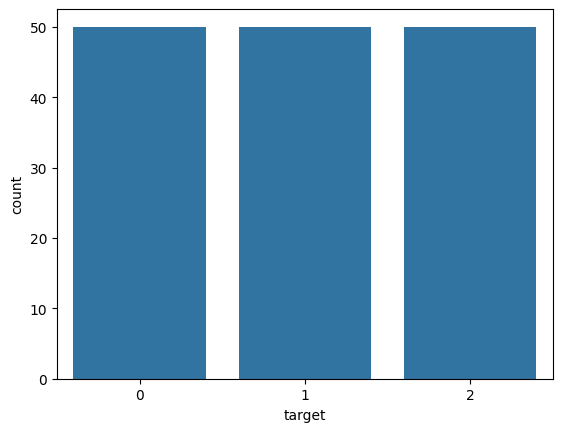

In [6]:
# equal population for the three classifications?
sns.countplot(x='target', data=iris_df)
plt.show()

<Axes: xlabel='target', ylabel='sepal length (cm)'>

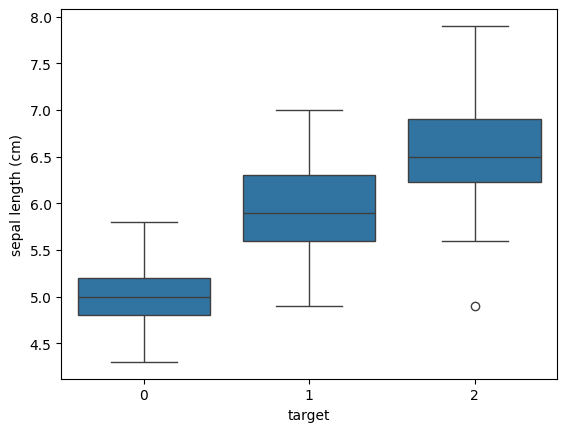

In [7]:
sns.boxplot(x='target', y='sepal length (cm)', data=iris_df)

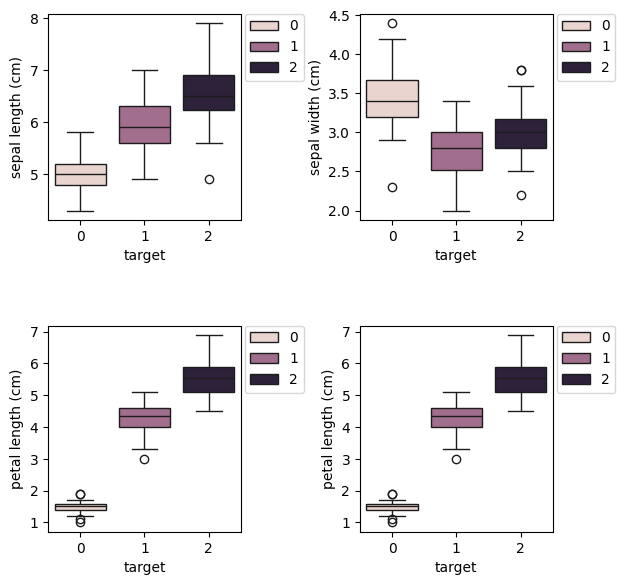

In [8]:
# any outliers?
fig, axs = plt.subplots(2,2, figsize=(7,7))
fig.tight_layout(pad=5.5)
sns.boxplot(x='target', y='sepal length (cm)', hue='target',data=iris_df, ax=axs[0,0])
axs[0,0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.boxplot(x='target', y='sepal width (cm)', hue='target', data=iris_df, ax=axs[0,1])
axs[0,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.boxplot(x='target', y='petal length (cm)', hue='target', data=iris_df, ax=axs[1,0])
axs[1,0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.boxplot(x='target', y='petal length (cm)', hue='target', data=iris_df, ax=axs[1,1])
axs[1,1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [9]:
# check min and max of each column
print('sepal length (cm)', np.min(iris_df['sepal length (cm)']), 'to', np.max(iris_df['sepal length (cm)']))
print('sepal width (cm)', np.min(iris_df['sepal width (cm)']), 'to', np.max(iris_df['sepal width (cm)']))
print('petal length (cm)', np.min(iris_df['petal length (cm)']), 'to', np.max(iris_df['petal length (cm)']))
print('petal width (cm)', np.min(iris_df['petal width (cm)']), 'to', np.max(iris_df['petal width (cm)']))

sepal length (cm) 4.3 to 7.9
sepal width (cm) 2.0 to 4.4
petal length (cm) 1.0 to 6.9
petal width (cm) 0.1 to 2.5


In [10]:
np.linspace(4,8,5)

array([4., 5., 6., 7., 8.])

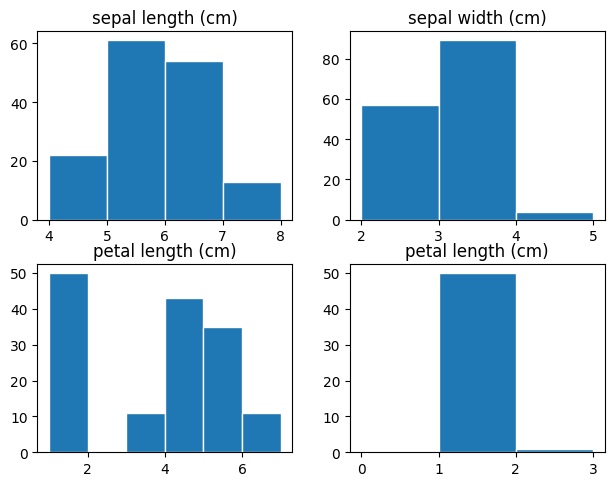

In [11]:
# check the distribution of the variables
# depending on whether they are close to the normal distribution, choose an oppropriate corr. coefficient among Pearson, Spearman and Kendal.
fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].hist(iris_df['sepal length (cm)'], edgecolor='w', bins=np.linspace(4,8,8-4+1))
axs[0,0].set_title('sepal length (cm)')
axs[0,1].hist(iris_df['sepal width (cm)'], edgecolor='w', bins=np.linspace(2,5,5-2+1))
axs[0,1].set_title('sepal width (cm)')
axs[1,0].hist(iris_df['petal length (cm)'], edgecolor='w', bins=np.linspace(1,7,7-1+1))
axs[1,0].set_title('petal length (cm)')
axs[1,1].hist(iris_df['petal length (cm)'], edgecolor='w', bins=np.linspace(0,3,3-0+1))
axs[1,1].set_title('petal length (cm)')
plt.show()

Check relation between variables

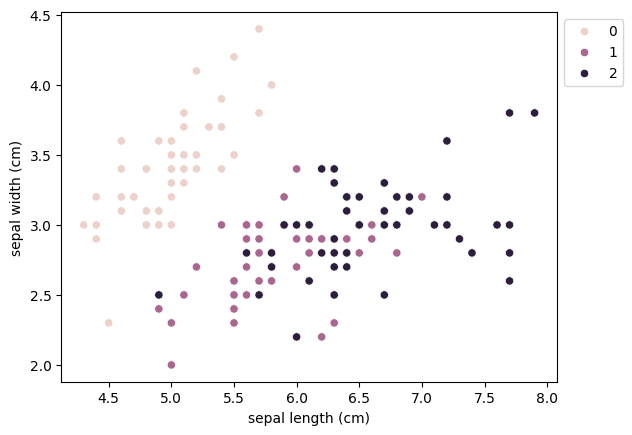

In [12]:
# relation btw sepal length and width
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='target', data=iris_df )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

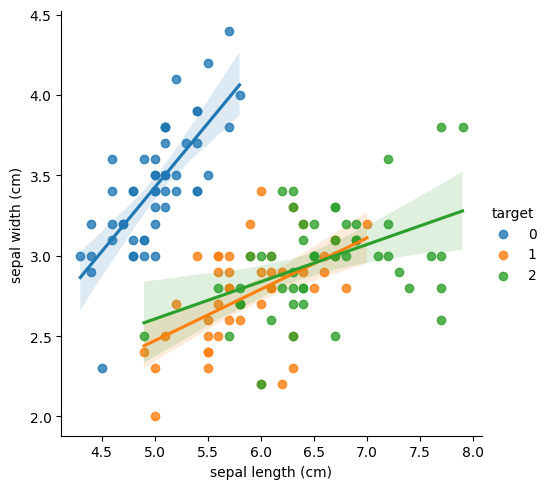

In [13]:
# reg plot for each classification?
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=iris_df)
plt.show()

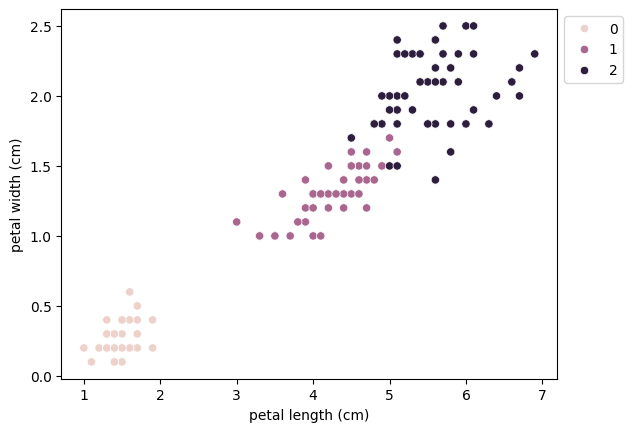

In [14]:
# do the same to the relation btw petal length and width
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=iris_df )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

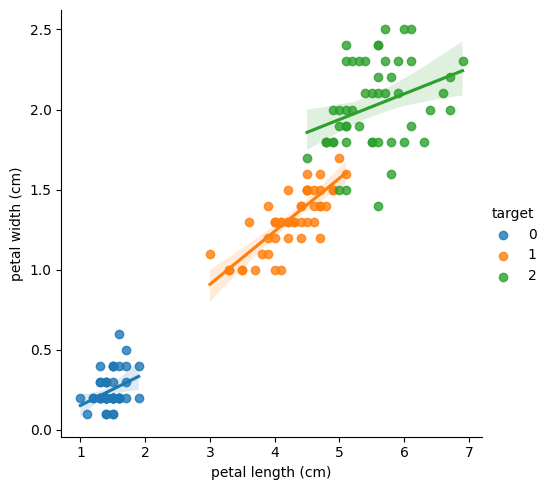

In [15]:
# reg plot for each classification?
sns.lmplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=iris_df)
plt.show()

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

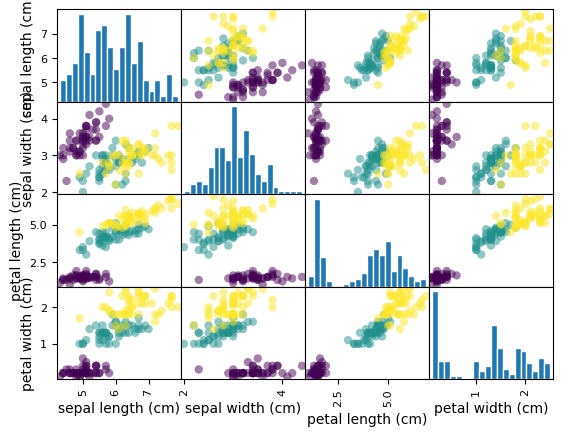

In [16]:
# show relation between all possible pairs in one plot : scattering matrix
pd.plotting.scatter_matrix(iris_data_df, c=iris.target, diagonal='hist', marker='o', cmap='viridis', hist_kwds={'bins':20, 'edgecolor':'white'})

Text(0.5, 1.0, 'heatmap of iris')

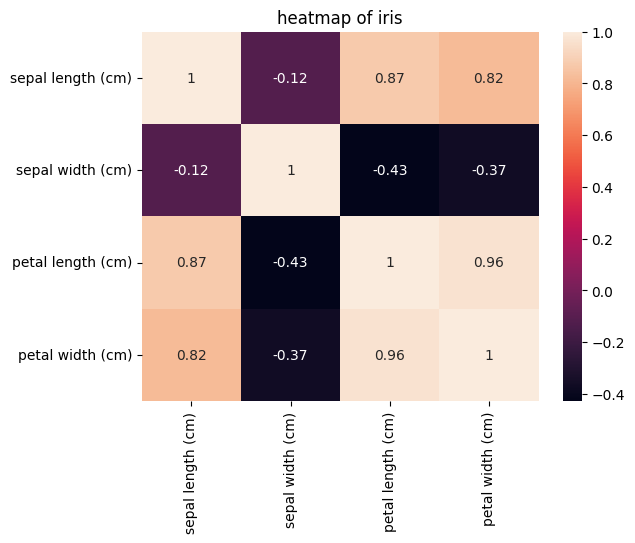

In [17]:
# correlation heatmap
iris_corr_mat = iris_data_df.corr()
fig, axs = plt.subplots()
sns.heatmap(iris_corr_mat, annot=True)
axs.set_title('heatmap of iris')

<Axes: ylabel='sepal width (cm)'>

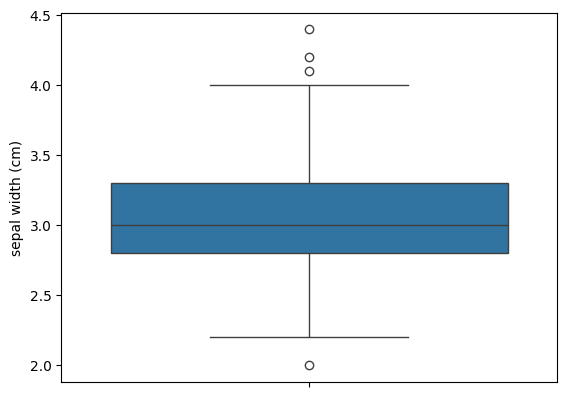

In [25]:
# deal with outliers
sns.boxplot(y=iris_df['sepal width (cm)'])

In [26]:
iris_df['sepal width (cm)'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width (cm), dtype: float64

In [32]:
# removed outliers based on IQR
Q1 = iris_df['sepal width (cm)'].quantile(0.25)
Q3 = iris_df['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iris_df_outliers_removed = iris_df.copy()
dropIdx = iris_df_outliers_removed[(iris_df_outliers_removed['sepal width (cm)']<lower_bound)|(iris_df_outliers_removed['sepal width (cm)']>upper_bound)].index
print(dropIdx)
iris_df_outliers_removed.drop(dropIdx, inplace=True)

# compare the result with the original one
print(iris_df.shape, iris_df_outliers_removed.shape)

Index([15, 32, 33, 60], dtype='int64')
(150, 5) (146, 5)


<Axes: ylabel='sepal width (cm)'>

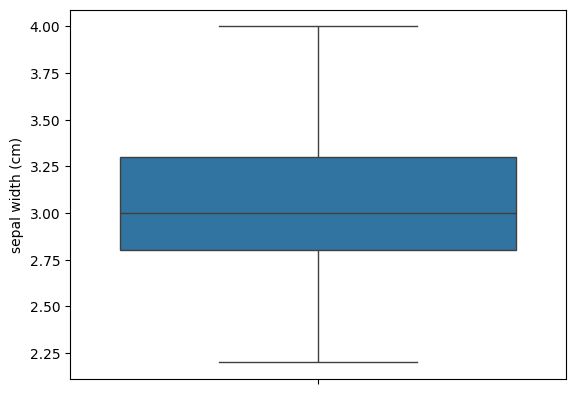

In [33]:
sns.boxplot(y=iris_df_outliers_removed['sepal width (cm)'])

In [34]:
# make it a function 
def drop_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_outliers_removed = df.copy()
    dropIdx = df_outliers_removed[(df_outliers_removed[col_name]<lower_bound)|(df_outliers_removed[col_name]>upper_bound)].index
    df_outliers_removed.drop(dropIdx, inplace=True)
    return df_outliers_removed

<Axes: ylabel='sepal width (cm)'>

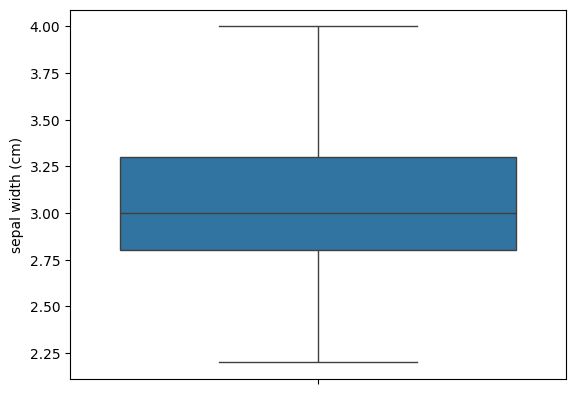

In [35]:
df_test = drop_outliers(iris_df, 'sepal width (cm)')
sns.boxplot(y=df_test['sepal width (cm)'])

Next, apply a classification alg to the data

In [36]:
# first, split the iris_df into input and target sets
iris_input = iris_df.iloc[:,0:4]
iris_target = iris_df['target']

# then split the data in train and test sets
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(iris_input, iris_target, random_state=42) # test_size=0.25 (default)

# use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_input, train_target)
dc.score(train_input, train_target)

1.0

In [37]:
dc.score(test_input, test_target)

1.0

In [41]:
from sklearn.metrics import accuracy_score

test_target_predicted = dc.predict(test_input)
accuracy_score(test_target, test_target_predicted)

1.0